In [ ]:
#importing necessary libraries and dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/RTA Dataset.csv.zip")
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.shape

(12316, 32)

In [ ]:
features=[i for i in df.columns]
print('Features of the dataset are:')
for i in features:
  print(i)

Features of the dataset are:
Time
Day_of_week
Age_band_of_driver
Sex_of_driver
Educational_level
Vehicle_driver_relation
Driving_experience
Type_of_vehicle
Owner_of_vehicle
Service_year_of_vehicle
Defect_of_vehicle
Area_accident_occured
Lanes_or_Medians
Road_allignment
Types_of_Junction
Road_surface_type
Road_surface_conditions
Light_conditions
Weather_conditions
Type_of_collision
Number_of_vehicles_involved
Number_of_casualties
Vehicle_movement
Casualty_class
Sex_of_casualty
Age_band_of_casualty
Casualty_severity
Work_of_casuality
Fitness_of_casuality
Pedestrian_movement
Cause_of_accident
Accident_severity


In [ ]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
#it is visible that there are columns having null values.
#There are 30 categorical features and only 2 numerical features in the dataset.

In [ ]:
#checking number of missing values in each column
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
#keeping only columns having 70% or more valid data.
df.dropna(how='all',thresh=df.shape[0]*.7, axis=1,inplace=True)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
#after dropping columns having more than 30% invalid data the input features dropped to 29.

In [ ]:
#collecting null columns only.
miss= df.columns[df.isna().sum()>0]
print(miss)
print('There are' ,len(miss),'columns having missing values.',)


Index(['Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Type_of_collision', 'Vehicle_movement',
       'Work_of_casuality', 'Fitness_of_casuality'],
      dtype='object')
There are 14 columns having missing values.


In [ ]:
#There are missing values in 14 categorical features.

In [ ]:
#summary of data set
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
#From the entire features list only two columns are of numerical category.

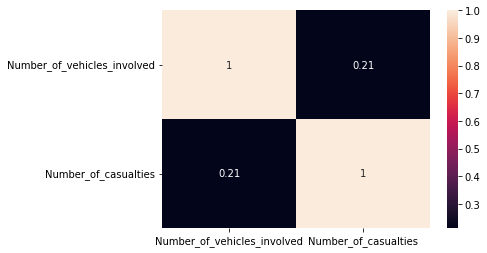

In [ ]:
#checking the correlation between numerical columns
sns.heatmap(df.corr(), annot=True)

In [ ]:
#we can find that these two variables are not much extremely correlated.they can be considered as independent variables.

In [ ]:
#finding target value_counts
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

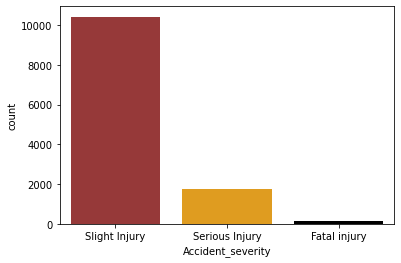

In [ ]:
#visualizing the counts of target values.
sns.countplot(df['Accident_severity'],palette=['brown','orange','black'])

In [ ]:

#Target value has 3 classes namely Slight Injury,Serious Injury,Fatal injury.
#There is a large difference in counts between each classes.
#Data is highly Imbalanced.


In [ ]:
#converting 'Time' feature data type into datetime format.extracting 'Hour of day' feature from 'Time' feature.
df['Time'] = pd.to_datetime(df['Time'])
df['Hour of day']=df['Time'].dt.hour
df=df.drop(['Time'],axis=1)
df.head(3)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour of day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            11575 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Area_accident_occured        12077 non-null  object
 9   Lanes_or_Medians             11931 non-null  object
 10  Road_allignment              12174 non-null  object
 11  Types_of_Junction            11429 non-null  object
 12  Road_surface_type            12144 non-null  object
 13  Road_surface_conditions      12

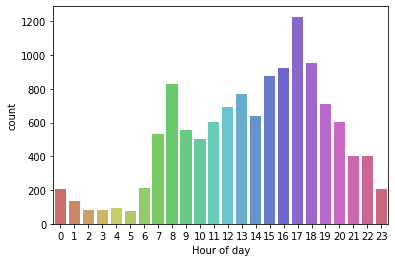

In [ ]:
sns.countplot(df['Hour of day'],palette='hls')

In [ ]:
#now the dataset has 3 numerical features.

Handling missing values

In [ ]:
#replacing 'null values' of categorical variables with its mode and checking for null values.
#there is no null values in numerical features.
for i in df.columns:
  if df[i].dtype=='object':
    df[i].fillna(df[i].mode() [0],inplace=True)
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Hour of day                    0
dtype: int

In [ ]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour of day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,other,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1


Categorical & Numerical features count plots.

In [ ]:
#seperating categorical columns and numerical columns
cat_col=[i for i in df.columns if df[i].dtype=='object' and i!='Accident_severity' ]
num_col=[i for i in df.columns if df[i].dtype=='int64']

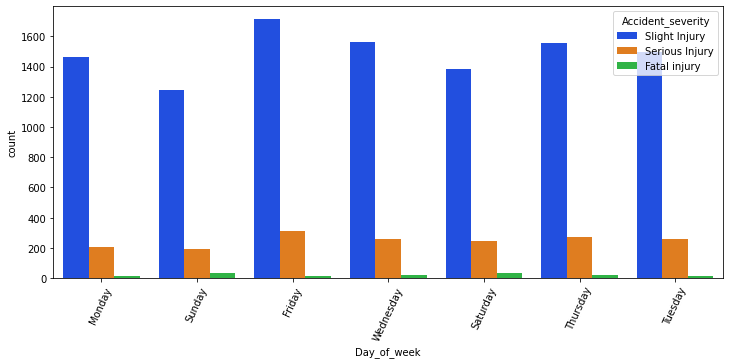

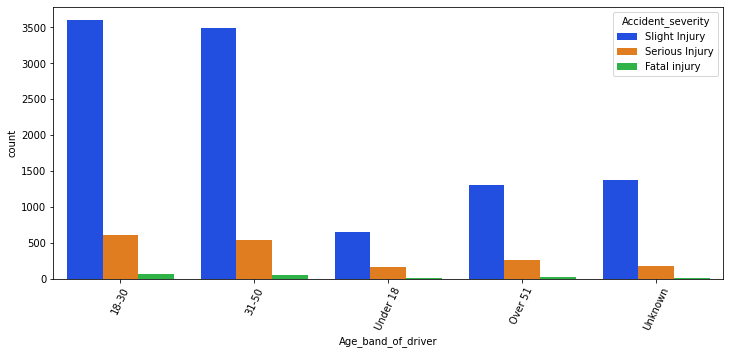

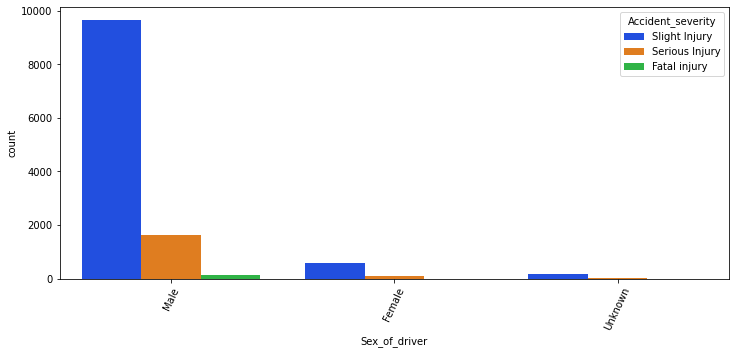

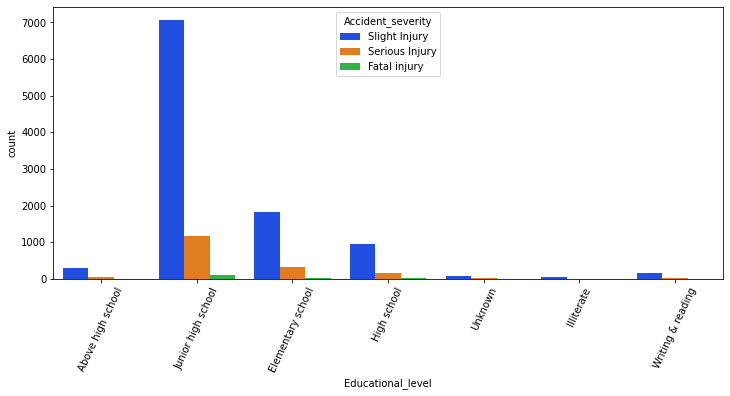

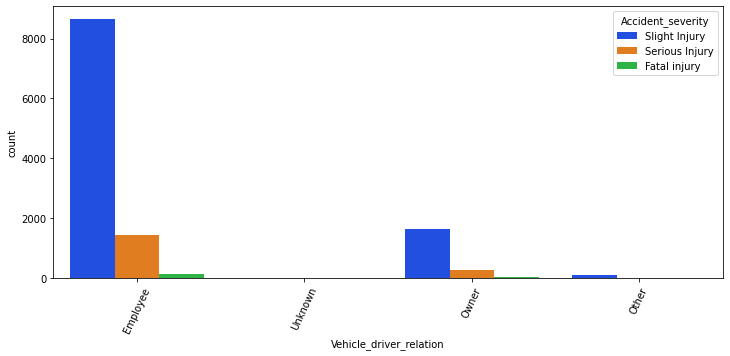

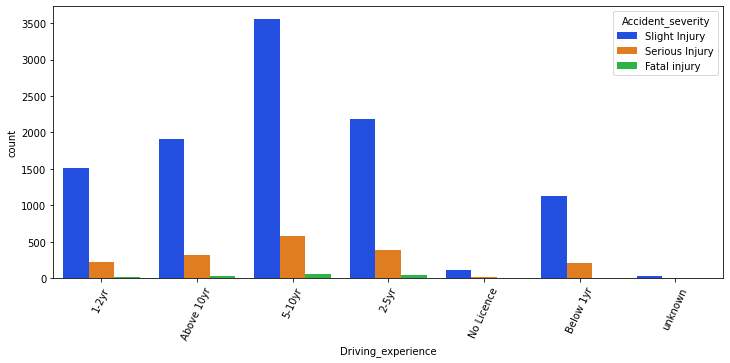

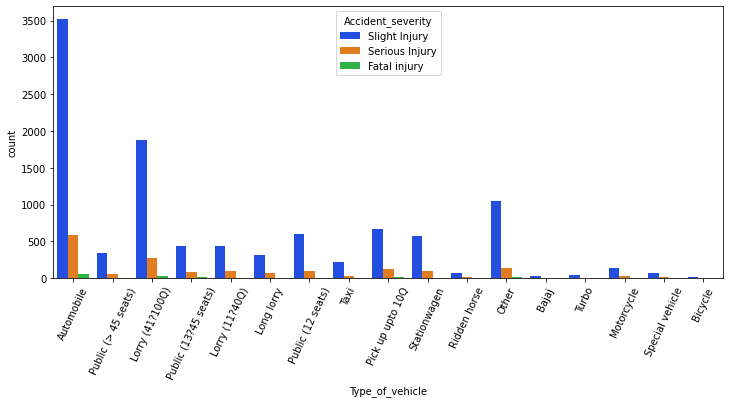

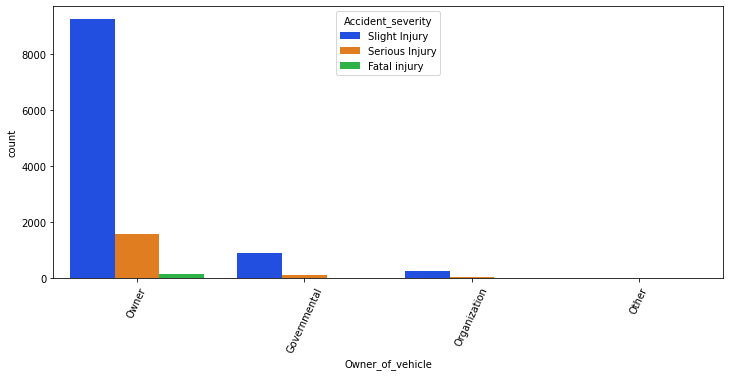

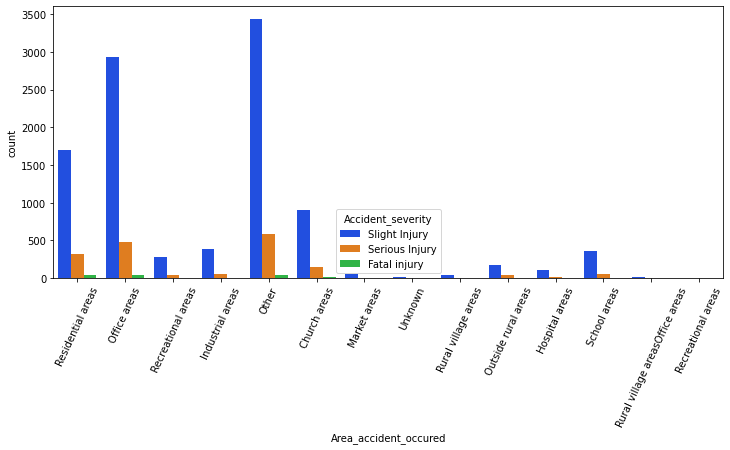

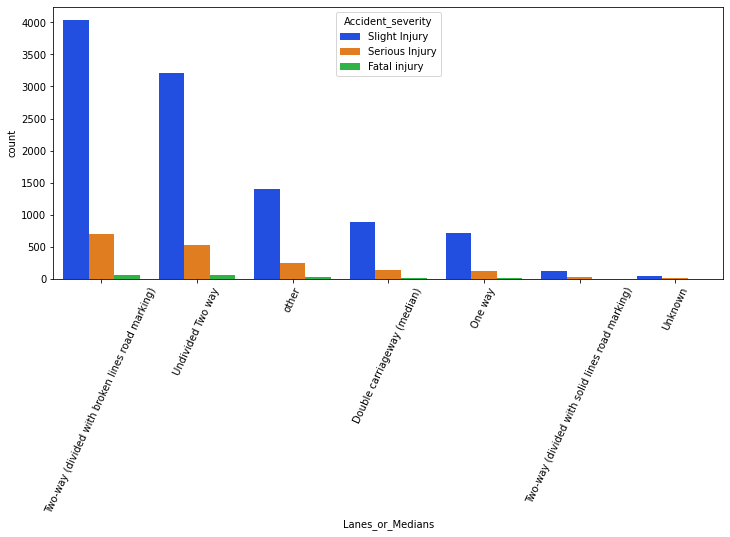

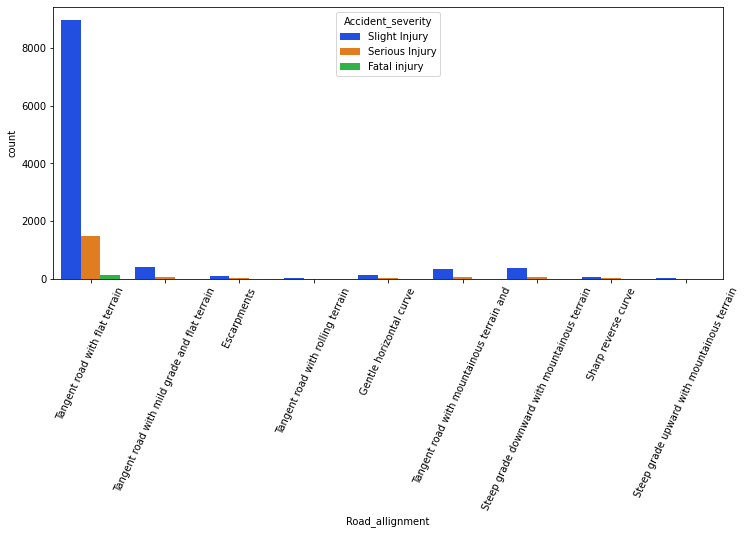

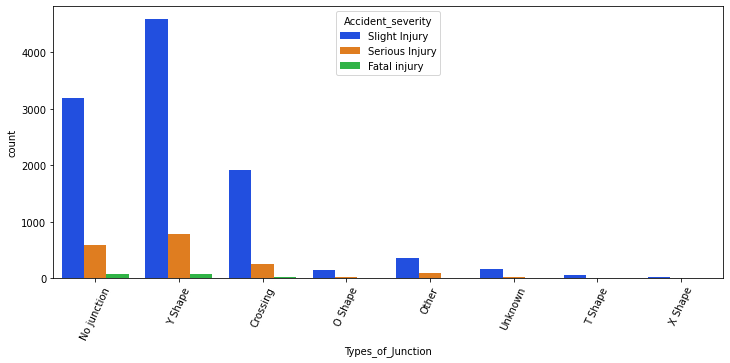

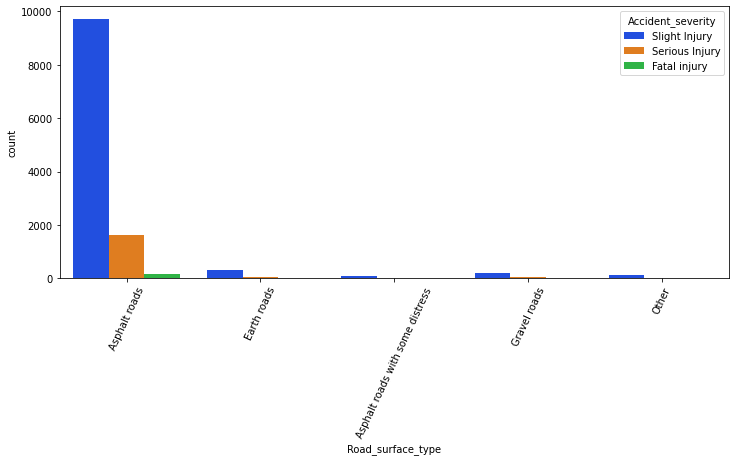

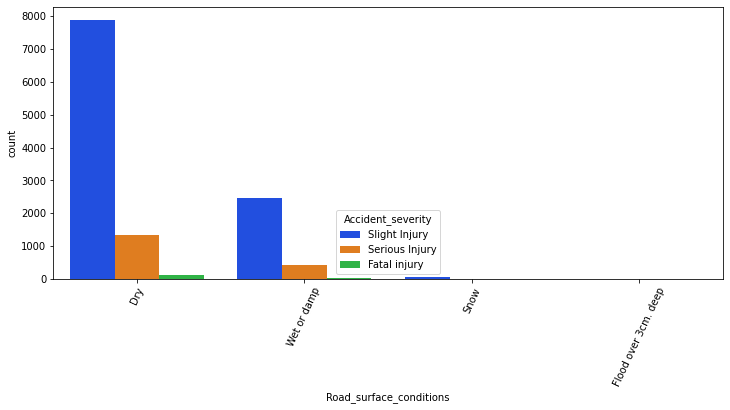

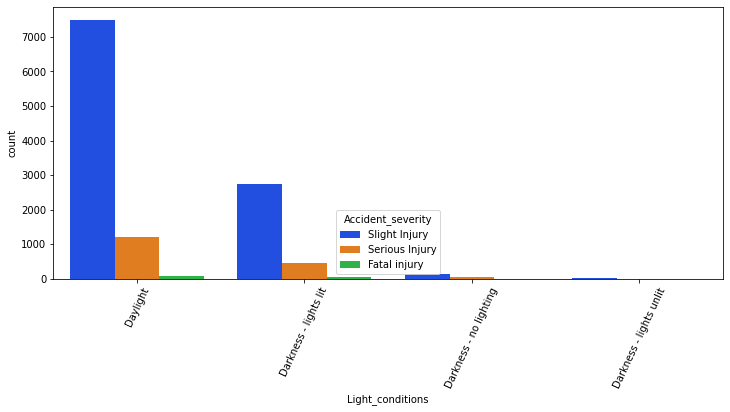

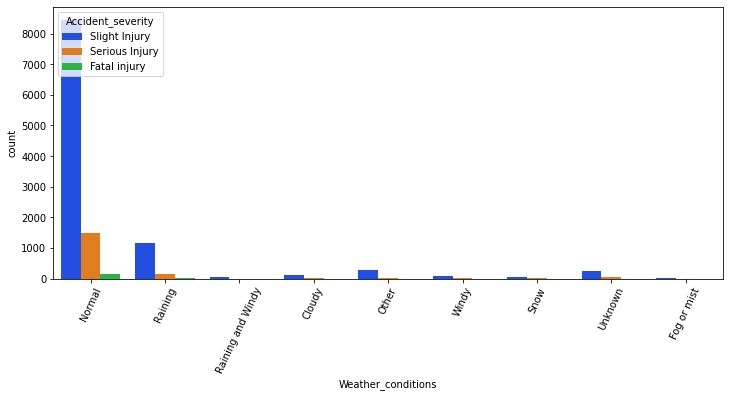

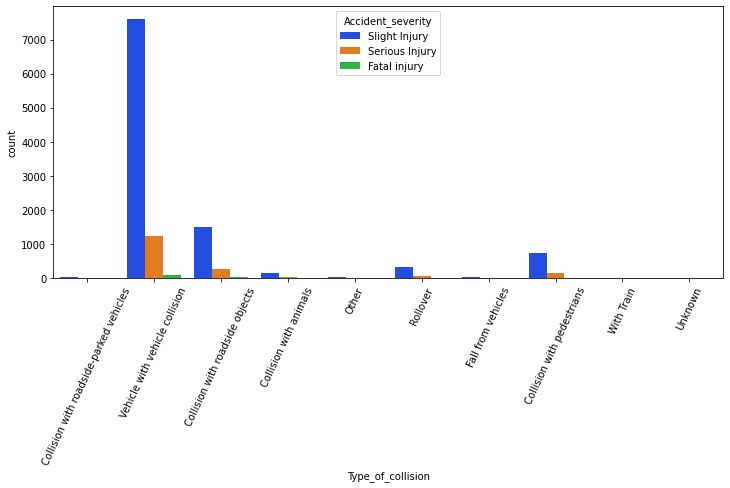

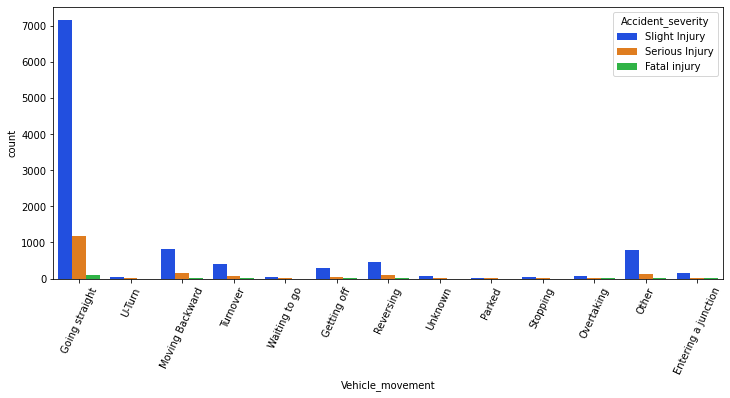

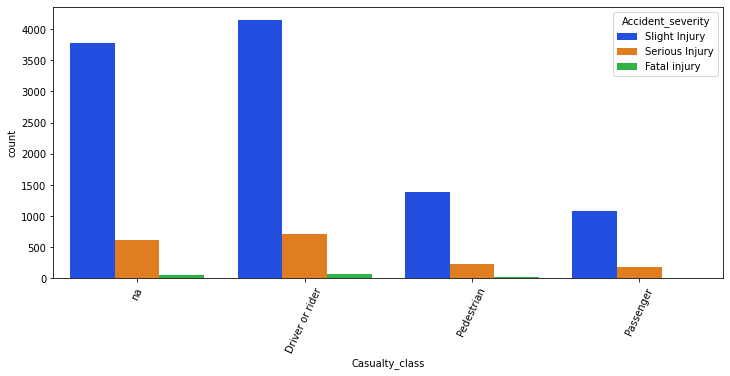

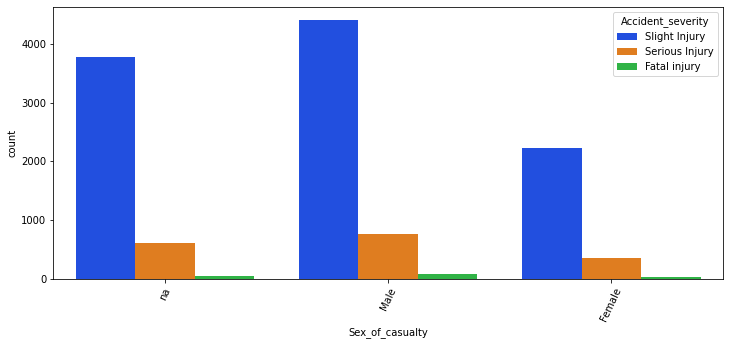

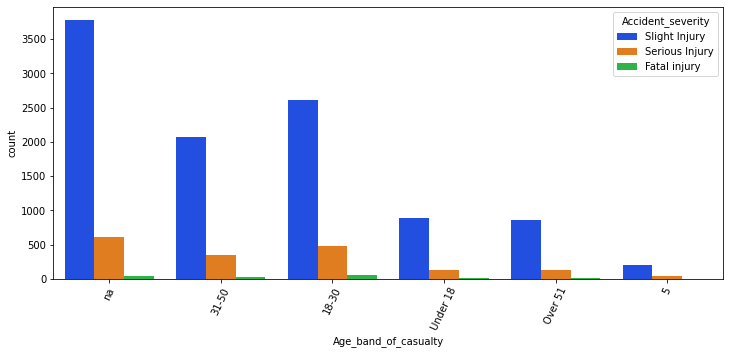

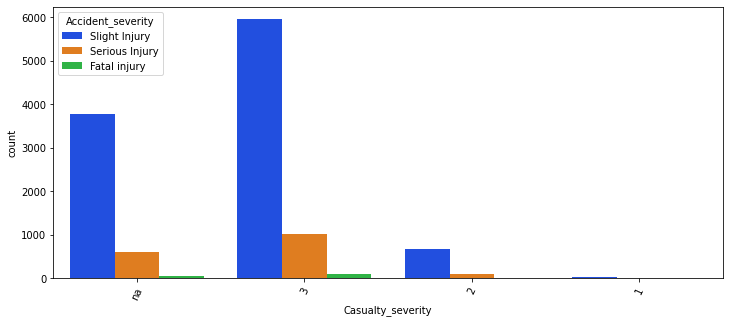

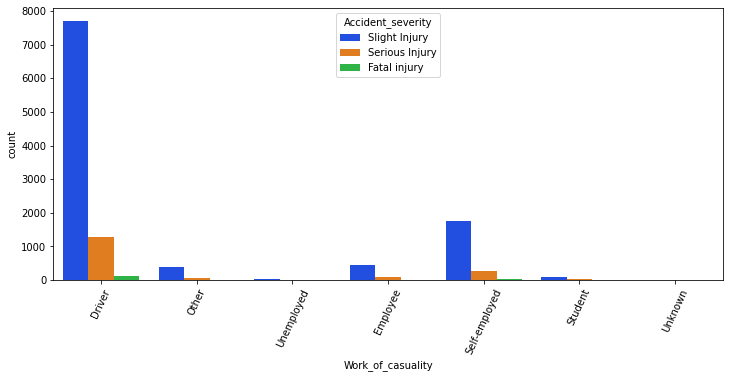

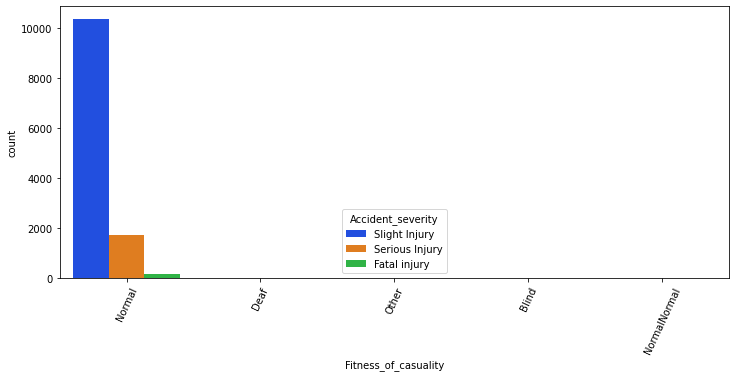

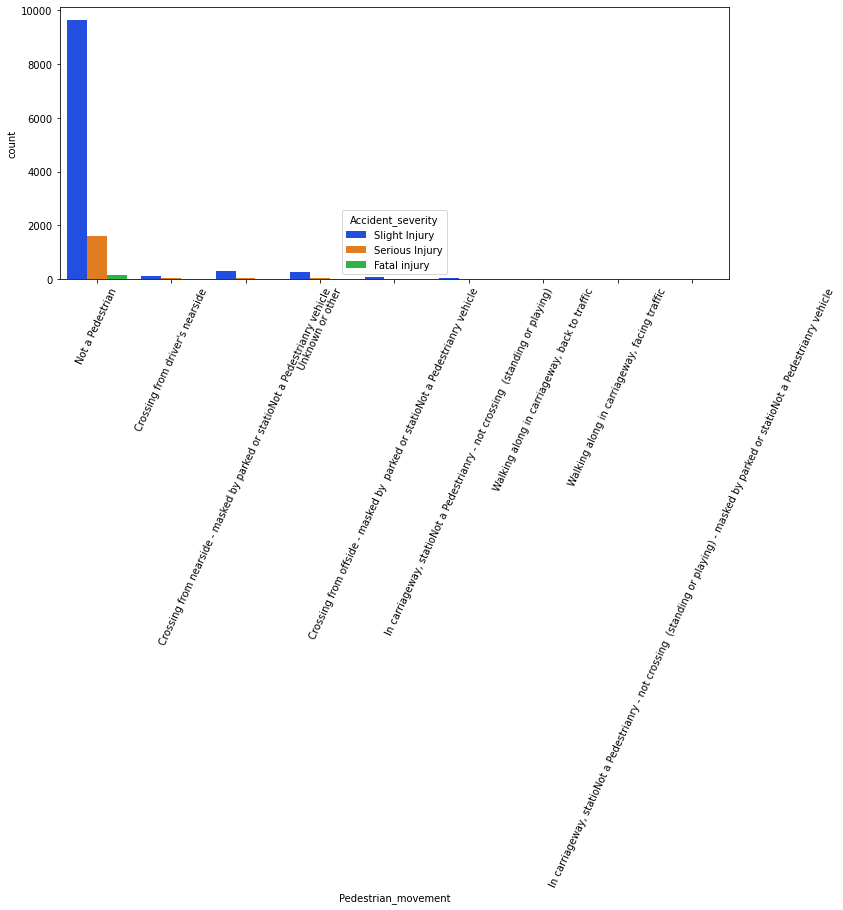

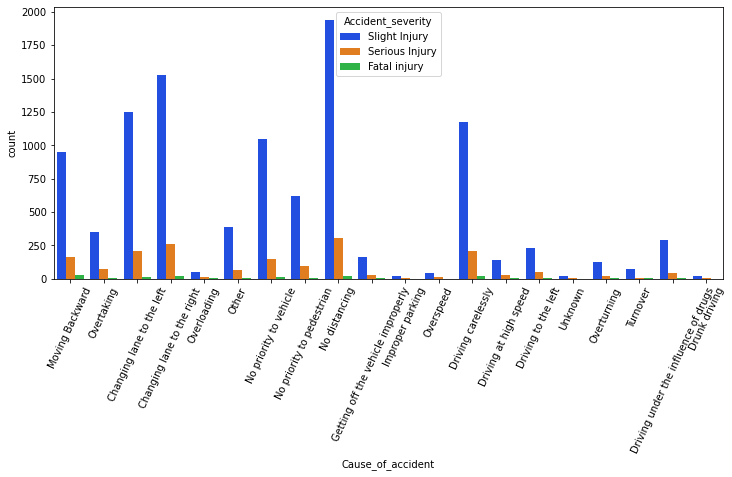

In [ ]:
#Categorical Data Visualization
def count_plot(col):
  df[col].value_counts()
  plt.figure(figsize=(12,5))
  sns.countplot(x=col,hue='Accident_severity',data=df,palette='bright')
  plt.xlabel(f'{col}')
  plt.xticks(rotation=65)
  plt.show
for col in cat_col:
  count_plot(col)

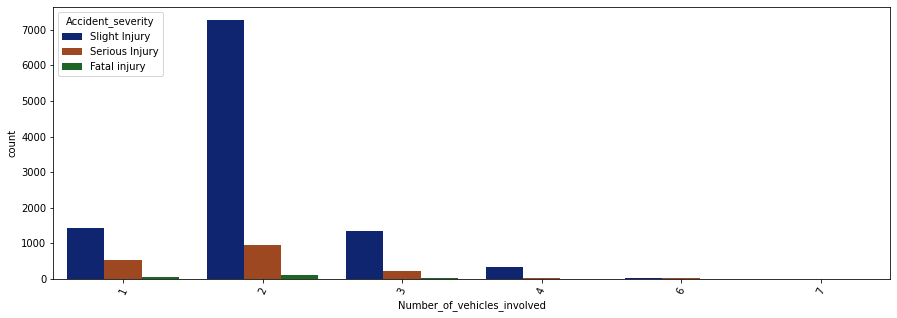

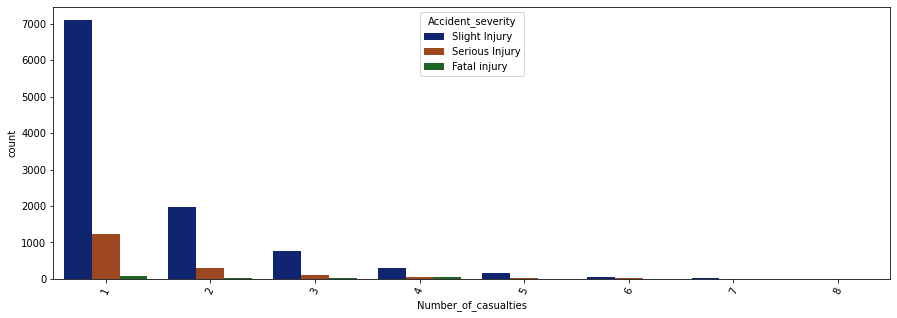

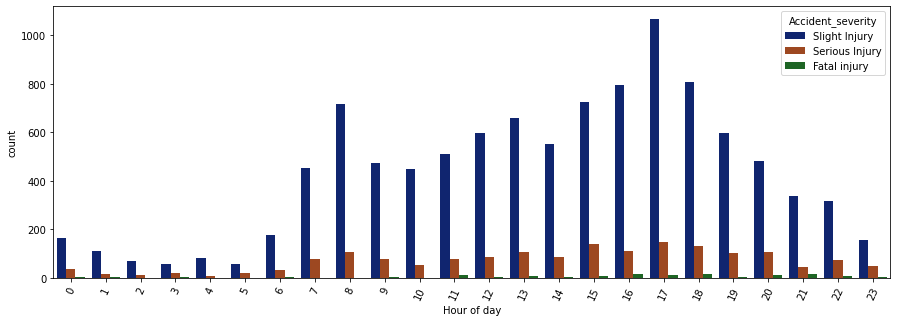

In [ ]:
#numerical data visualization
def count_plot(col):
  df[col].value_counts()
  plt.figure(figsize=(15,5))
  sns.countplot(x=col,hue='Accident_severity',data=df,palette='dark')
  plt.xlabel(f'{col}')
  plt.xticks(rotation=65)
  plt.show
for col in num_col:
  count_plot(col)

Handling Numerical Features

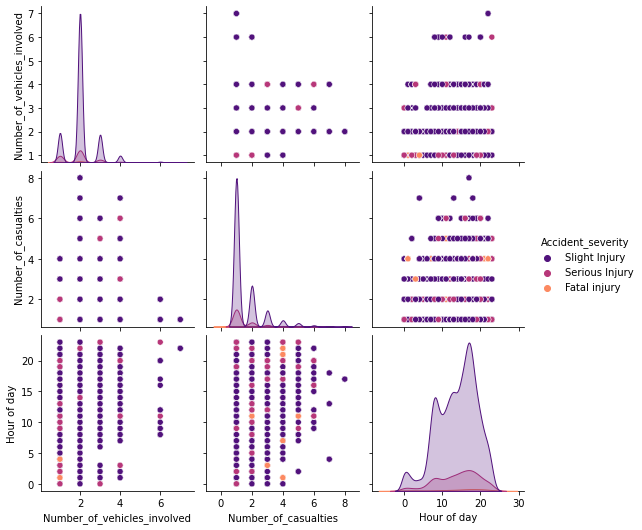

In [ ]:
#checking for pairwise relationships between the three
sns.pairplot(df,hue='Accident_severity',palette='crest')

In [ ]:
#couldn't find any relationship between the numerical features.

Text(0.5, 1.0, 'Pearson Correlation of Features')

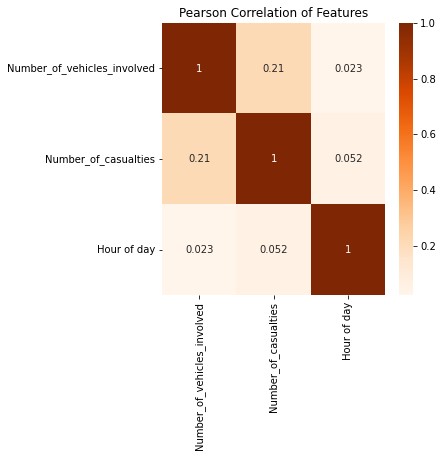

In [ ]:
#finding correlation between the numerical features
plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap="Oranges")
plt.title('Pearson Correlation of Features')

In [ ]:
#Number_of_vehicles_involved,Number_of_casualties have the strongest correlation of 0.21.
# everything else is independent of each other.
#A correlation of 0.21 isn't very strong. Therefore I will choose to leave three in the model.

Handling categorical features

In [ ]:
#Label encoding categorical features before chi square test.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_category=pd.DataFrame()
for i in cat_col:
  df_category[i]=le.fit_transform(df[i])
df_category.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,...,3,2,3,2,5,3,0,2,5,9
1,1,1,1,4,0,3,11,3,6,4,...,8,2,3,2,5,3,0,2,5,16
2,1,0,1,4,0,0,5,3,1,6,...,2,2,0,1,1,2,0,2,5,0
3,3,0,1,4,0,2,11,0,6,6,...,8,2,2,0,0,2,0,2,5,1
4,3,0,1,4,0,1,0,3,4,6,...,8,2,3,2,5,3,0,2,5,16


In [ ]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int64
 1   Age_band_of_driver       12316 non-null  int64
 2   Sex_of_driver            12316 non-null  int64
 3   Educational_level        12316 non-null  int64
 4   Vehicle_driver_relation  12316 non-null  int64
 5   Driving_experience       12316 non-null  int64
 6   Type_of_vehicle          12316 non-null  int64
 7   Owner_of_vehicle         12316 non-null  int64
 8   Area_accident_occured    12316 non-null  int64
 9   Lanes_or_Medians         12316 non-null  int64
 10  Road_allignment          12316 non-null  int64
 11  Types_of_Junction        12316 non-null  int64
 12  Road_surface_type        12316 non-null  int64
 13  Road_surface_conditions  12316 non-null  int64
 14  Light_conditions         12316 non-null  int64
 15  We

In [ ]:
#setting target column to a new variable
target=df['Accident_severity']


Categorical Feature selection using Chi-Squared Test.

In [ ]:
#H0:features doesnt affect target variable.

In [ ]:
from sklearn.feature_selection import chi2
scores=chi2(df_category,target)
f_p_values=pd.DataFrame({'categorical_columns':df_category.columns,'F_score':scores[0],'P_values':scores[1]})
f_p_values.sort_values(by='P_values',ascending=True)

,categorical_columns,F_score,P_values
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


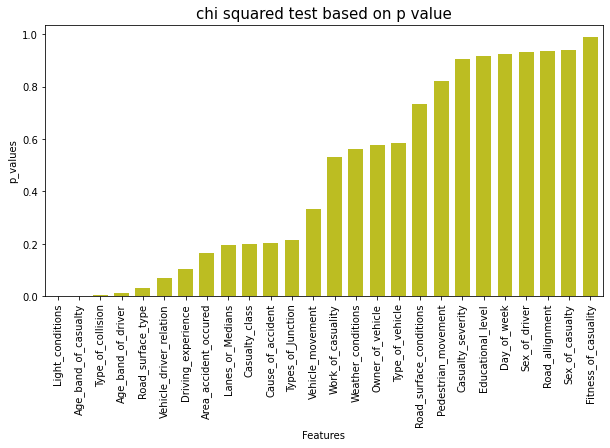

In [ ]:
p_value=pd.Series(scores[1],index=df_category.columns)
p_value.sort_values(ascending=True,inplace=True)
plt.figure(figsize=(10,5))
p_value.plot(kind="bar",color='tab:olive',width=0.7)
plt.xlabel("Features",fontsize=10)
plt.ylabel("p_values",fontsize=10)
plt.title("chi squared test based on p value",fontsize=15)
plt.show()

In [ ]:
#if a column shows p-value <=0.1 then we reject the null hypothesis and say that ‘Column/Feature' affects the target.
#in otherwords,higher score would be obtained if the variable showed no interaction with the target.

In [ ]:
#creating new dataframe having relevant features only
df1=df.drop(['Area_accident_occured','Lanes_or_Medians','Casualty_class','Cause_of_accident','Types_of_Junction','Vehicle_movement',
'Weather_conditions',	'Owner_of_vehicle'	,'Type_of_vehicle','Road_surface_conditions'	,'Pedestrian_movement','Casualty_severity',	'Educational_level','Day_of_week'	,'Sex_of_driver',	'Road_allignment',
'Sex_of_casualty'],axis=1)
df1.head()


,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Road_surface_type,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Accident_severity,Hour of day
0,18-30,Employee,1-2yr,Asphalt roads,Daylight,Collision with roadside-parked vehicles,2,2,na,Driver,Normal,Slight Injury,17
1,31-50,Employee,Above 10yr,Asphalt roads,Daylight,Vehicle with vehicle collision,2,2,na,Driver,Normal,Slight Injury,17
2,18-30,Employee,1-2yr,Asphalt roads,Daylight,Collision with roadside objects,2,2,31-50,Driver,Normal,Serious Injury,17
3,18-30,Employee,5-10yr,Earth roads,Darkness - lights lit,Vehicle with vehicle collision,2,2,18-30,Driver,Normal,Slight Injury,1
4,18-30,Employee,2-5yr,Asphalt roads,Darkness - lights lit,Vehicle with vehicle collision,2,2,na,Driver,Normal,Slight Injury,1


In [ ]:
df1.shape

(12316, 13)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Road_surface_type            12316 non-null  object
 4   Light_conditions             12316 non-null  object
 5   Type_of_collision            12316 non-null  object
 6   Number_of_vehicles_involved  12316 non-null  int64 
 7   Number_of_casualties         12316 non-null  int64 
 8   Age_band_of_casualty         12316 non-null  object
 9   Work_of_casuality            12316 non-null  object
 10  Fitness_of_casuality         12316 non-null  object
 11  Accident_severity            12316 non-null  object
 12  Hour of day                  12316 non-null  int64 
dtypes: int64(3), object(10)
memory 

In [ ]:
cat_features=[i for i in df1.columns if df1[i].dtype=='object']
print('RELEVENT CATEGORICAL FEATURES ARE:\n',cat_features)

RELEVENT CATEGORICAL FEATURES ARE:
 ['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Road_surface_type', 'Light_conditions', 'Type_of_collision', 'Age_band_of_casualty', 'Work_of_casuality', 'Fitness_of_casuality', 'Accident_severity']


In [ ]:
#count distinct values in each category
for i in df.columns:
  print("DISTINCT VALUES IN",i,"ARE\n",df[i].value_counts())
  print('-'*150)

DISTINCT VALUES IN Day_of_week ARE
 Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
DISTINCT VALUES IN Age_band_of_driver ARE
 18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
DISTINCT VALUES IN Sex_of_driver ARE
 Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
DISTINCT VALUES IN Educational_level ARE
 Junior high school   

In [ ]:
#converting the relevant categorical features to numeric using Get dummy encoding
dummy=pd.get_dummies(df1[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Road_surface_type',
                          'Light_conditions', 'Type_of_collision', 'Age_band_of_casualty',
                          'Work_of_casuality', 'Fitness_of_casuality']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Work_of_casuality_Employee,Work_of_casuality_Other,Work_of_casuality_Self-employed,Work_of_casuality_Student,Work_of_casuality_Unemployed,Work_of_casuality_Unknown,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_NormalNormal,Fitness_of_casuality_Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#final dataset with all relevant features in numeric.
df2=pd.concat([df1,dummy],axis=1)
df2.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
          'Road_surface_type', 'Light_conditions','Type_of_collision', 'Age_band_of_casualty', 'Work_of_casuality',
          'Fitness_of_casuality'],axis=1,inplace=True)
df2.head()


,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Hour of day,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,...,Work_of_casuality_Employee,Work_of_casuality_Other,Work_of_casuality_Self-employed,Work_of_casuality_Student,Work_of_casuality_Unemployed,Work_of_casuality_Unknown,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_NormalNormal,Fitness_of_casuality_Other
0,2,2,Slight Injury,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,Slight Injury,17,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,Serious Injury,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df2.shape

(12316, 48)

Seperating Input and Output Variables

In [ ]:
#seperating x and y
x=df2.drop(['Accident_severity'],axis=1)
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour of day,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Work_of_casuality_Employee,Work_of_casuality_Other,Work_of_casuality_Self-employed,Work_of_casuality_Student,Work_of_casuality_Unemployed,Work_of_casuality_Unknown,Fitness_of_casuality_Deaf,Fitness_of_casuality_Normal,Fitness_of_casuality_NormalNormal,Fitness_of_casuality_Other
0,2,2,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y=df2['Accident_severity']
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

Handling Imbalanced Dataset with SMOTE

In [ ]:
#we have already seen that the target variable is highly imbalanced
#to improve the model accuracy we are using oversampling technique  SMOTE .
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)
y1=pd.DataFrame(y)
y1.value_counts()


Accident_severity
Fatal injury         10415
Serious Injury       10415
Slight Injury        10415
dtype: int64

Splitting Dataset into Testing and Training Datasets.

In [ ]:
#SPLITTING TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print("shape of training data:",x_train.shape)
print("shape of testing data:",x_test.shape)
print("shape of training target:",y_train.shape)
print("shape of testing target:",y_test.shape)

shape of training data: (21871, 47)
shape of testing data: (9374, 47)
shape of training target: (21871,)
shape of testing target: (9374,)


Applying Classification algorithms to categorize data into a category.

In [ ]:
#MODEL CREATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
knn=KNeighborsClassifier()
nb=MultinomialNB()
svm=SVC()
tree=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=5,criterion='entropy')


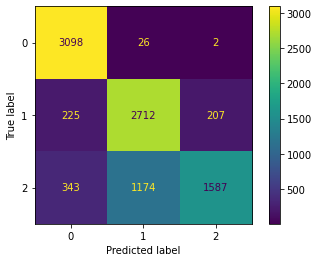

In [ ]:
#KNN
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
mat_knn=confusion_matrix(y_test,y_knn)
cmd_knn=ConfusionMatrixDisplay(mat_knn)
cmd_knn.plot()


In [ ]:
report1=classification_report(y_test,y_knn)
print("REPORT OF KNN MODEL:\n",report1)
knn_score=accuracy_score(y_test,y_knn)
print("ACCURACY_SCORE=",knn_score)

REPORT OF KNN MODEL:
                 precision    recall  f1-score   support

  Fatal injury       0.85      0.99      0.91      3126
Serious Injury       0.69      0.86      0.77      3144
 Slight Injury       0.88      0.51      0.65      3104

      accuracy                           0.79      9374
     macro avg       0.81      0.79      0.78      9374
  weighted avg       0.81      0.79      0.78      9374

ACCURACY_SCORE= 0.7890975037337316


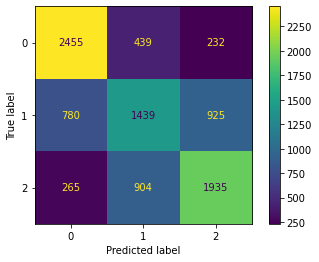

In [ ]:
#NAIVE BAYES
nb.fit(x_train,y_train)
y_nb=nb.predict(x_test)
mat_nb=confusion_matrix(y_test,y_nb)
cmd_nb=ConfusionMatrixDisplay(mat_nb)
cmd_nb.plot()


In [ ]:
report2=classification_report(y_test,y_nb)
print("REPORT OF NAIVE BAYES MODEL:\n",report2)
nb_score=accuracy_score(y_test,y_nb)
print("ACCURACY_SCORE=",nb_score)

REPORT OF NAIVE BAYES MODEL:
                 precision    recall  f1-score   support

  Fatal injury       0.70      0.79      0.74      3126
Serious Injury       0.52      0.46      0.49      3144
 Slight Injury       0.63      0.62      0.62      3104

      accuracy                           0.62      9374
     macro avg       0.61      0.62      0.62      9374
  weighted avg       0.61      0.62      0.62      9374

ACCURACY_SCORE= 0.6218263281416685


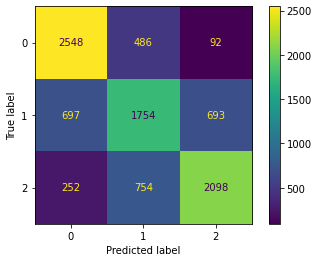

In [ ]:
#SVM
svm.fit(x_train,y_train)
y_svm=svm.predict(x_test)
mat_svm=confusion_matrix(y_test,y_svm)
cmd_svm=ConfusionMatrixDisplay(mat_svm)
cmd_svm.plot()



In [ ]:
report3=classification_report(y_test,y_svm)
print("REPORT OF SVM MODEL:\n",report3)
svm_score=accuracy_score(y_test,y_svm)
print("ACCURACY_SCORE=",svm_score)

REPORT OF SVM MODEL:
                 precision    recall  f1-score   support

  Fatal injury       0.73      0.82      0.77      3126
Serious Injury       0.59      0.56      0.57      3144
 Slight Injury       0.73      0.68      0.70      3104

      accuracy                           0.68      9374
     macro avg       0.68      0.68      0.68      9374
  weighted avg       0.68      0.68      0.68      9374

ACCURACY_SCORE= 0.6827394922125026


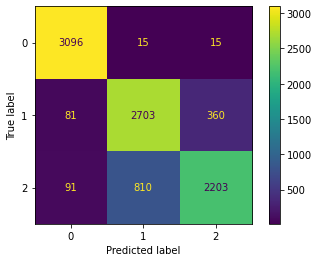

In [ ]:
#DECISION TREE
tree.fit(x_train,y_train)
y_tree=tree.predict(x_test)
mat_tree=confusion_matrix(y_test,y_tree)
cmd_tree=ConfusionMatrixDisplay(mat_tree)
cmd_tree.plot()

In [ ]:
report4=classification_report(y_test,y_tree)
print("REPORT OF DECISION TREE MODEL:\n",report4)
tree_score=accuracy_score(y_test,y_tree)
print("ACCURACY_SCORE=",tree_score)

REPORT OF DECISION TREE MODEL:
                 precision    recall  f1-score   support

  Fatal injury       0.95      0.99      0.97      3126
Serious Injury       0.77      0.86      0.81      3144
 Slight Injury       0.85      0.71      0.78      3104

      accuracy                           0.85      9374
     macro avg       0.86      0.85      0.85      9374
  weighted avg       0.86      0.85      0.85      9374

ACCURACY_SCORE= 0.8536377213569447


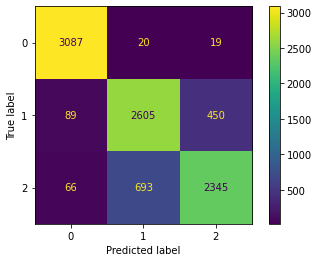

In [ ]:
#RANDOM FOREST
rf.fit(x_train,y_train)
y_rf=rf.predict(x_test)
mat_rf=confusion_matrix(y_test,y_rf)
cmd_rf=ConfusionMatrixDisplay(mat_rf)
cmd_rf.plot()


In [ ]:
report5=classification_report(y_test,y_rf)
print("REPORT OF RANDOM FOREST MODEL:\n",report5)
rf_score=accuracy_score(y_test,y_rf)
print("ACCURACY_SCORE=",rf_score)

REPORT OF RANDOM FOREST MODEL:
                 precision    recall  f1-score   support

  Fatal injury       0.95      0.99      0.97      3126
Serious Injury       0.79      0.83      0.81      3144
 Slight Injury       0.83      0.76      0.79      3104

      accuracy                           0.86      9374
     macro avg       0.86      0.86      0.86      9374
  weighted avg       0.86      0.86      0.86      9374

ACCURACY_SCORE= 0.8573714529549818


Performance Evaluation of various classification Algorithms.

In [ ]:
#COMPARING ACCURACY OF VARIOUS CLASSIFICATION MODELS
models=['KNN','NAIVE BAYES','SVM','DECISION TREE','RANDOM_FOREST']
accuracy_scores=[knn_score,nb_score,svm_score,tree_score,rf_score]
score_df=pd.DataFrame({'MODEL':models,"ACCURACY_SCORE":accuracy_scores})
score_df.ACCURACY_SCORE=score_df.ACCURACY_SCORE*100
score_df.sort_values(by='ACCURACY_SCORE',ascending=False,inplace=True)
score_df

,MODEL,ACCURACY_SCORE
4,RANDOM_FOREST,85.737145
3,DECISION TREE,85.363772
0,KNN,78.909750
2,SVM,68.273949
1,NAIVE BAYES,62.182633


Text(0.5, 1.0, 'MODELS VS ACCURACY_SCORES')

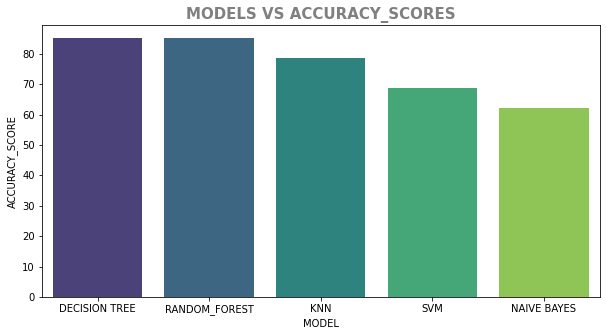

In [ ]:
#visualizing the accuracies of models
plt.figure(figsize=(10,5))
plot=sns.barplot(x='MODEL',y='ACCURACY_SCORE',data=score_df,palette='viridis')
plot.set_title('MODELS VS ACCURACY_SCORES',fontdict={'size':15,'weight':'bold','color':'grey'})

CONCLUSION:
Out of the five classification Algorithms described in the problem, Random forest Algorithm and Decision tree algorithm classifies the dataset better with an accuracy of 85.7% and 85.3% respectively.